<a href="https://colab.research.google.com/github/anwishn/ESAA/blob/main/0923_%EA%B3%BC%EC%A0%9C_matplotlib_seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

두잇 판다스 입문 p.81-119

# 4. 그래프 그리기

## 4-1 데이터 시각화가 필요한 이유

### 앤스콤 4분할 그래프 살펴보기

4개의 데이터 그룹이 각각 평균, 분산과 같은 수칫값이나 상관관계, 회귀선이 같다 

=> 데이터가 모두 같을 것이라 추측 but 시각화해보면 서로 다른 데이터 패턴을 가지고 있음을 알 수 있다.(함정)

* seaborn 라이브러리에 포함 <u>import seaborn as sns</u>

#### 앤스콤 데이터 집합 불러온 후 그래프 그리기

**load_dataset** 메서드 : 데이터 집합 불러오기

In [43]:
import seaborn as sns

anscombe = sns.load_dataset("anscombe")
print(anscombe)
print(type(anscombe))

   dataset     x      y
0        I  10.0   8.04
1        I   8.0   6.95
2        I  13.0   7.58
3        I   9.0   8.81
4        I  11.0   8.33
5        I  14.0   9.96
6        I   6.0   7.24
7        I   4.0   4.26
8        I  12.0  10.84
9        I   7.0   4.82
10       I   5.0   5.68
11      II  10.0   9.14
12      II   8.0   8.14
13      II  13.0   8.74
14      II   9.0   8.77
15      II  11.0   9.26
16      II  14.0   8.10
17      II   6.0   6.13
18      II   4.0   3.10
19      II  12.0   9.13
20      II   7.0   7.26
21      II   5.0   4.74
22     III  10.0   7.46
23     III   8.0   6.77
24     III  13.0  12.74
25     III   9.0   7.11
26     III  11.0   7.81
27     III  14.0   8.84
28     III   6.0   6.08
29     III   4.0   5.39
30     III  12.0   8.15
31     III   7.0   6.42
32     III   5.0   5.73
33      IV   8.0   6.58
34      IV   8.0   5.76
35      IV   8.0   7.71
36      IV   8.0   8.84
37      IV   8.0   8.47
38      IV   8.0   7.04
39      IV   8.0   5.25
40      IV  19.0

* matplotlib 라이브러리로 그래프 그리기

In [44]:
%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt

* 첫 번째 데이터 그룹 추출

In [45]:
dataset_1 = anscombe[anscombe['dataset'] == 'I']

* 선그래프 **plot**메서드 : x, y축 데이터 전달

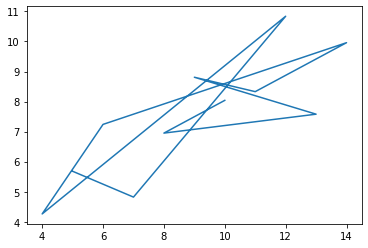

In [46]:
plt.plot(dataset_1['x'], dataset_1['y'])

* 점으로 그래프 -> 세 번째 인자로 'o'

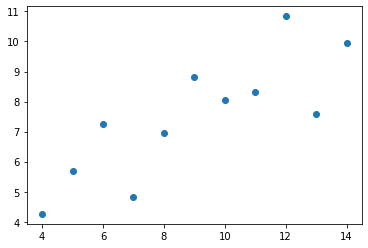

In [47]:
plt.plot(dataset_1['x'], dataset_1['y'], 'o')

### 앤스콤 데이터 집합 모두 사용해 그래프 만들기

* matplotlib 라이브러리로 그래프 그리기

1) 전체 그래프가 위치할 기본 틀 만들기

2) 그래프를 그려 넣을 그래프 격자 만들기

3) 격자에 그래프를 하나씩 추가. 왼쪽에서 오른쪽 방향으로 추가.

4) 만약 격자의 첫 번째 행이 꽉 차면 두 번째 행에 그래프 그려넣기

#### 한 번에 4개의 그래프 그리기

In [48]:
dataset_2 = anscombe[anscombe['dataset'] == 'II']
dataset_3 = anscombe[anscombe['dataset'] == 'III']
dataset_4 = anscombe[anscombe['dataset'] == 'IV']

* 기본 틀 **plt.figure()**
* 그래프 격자 **add_subplot** 메서드 : 첫 번째 인자에 행 크기, 두 번째 인자에 열 크기 지정

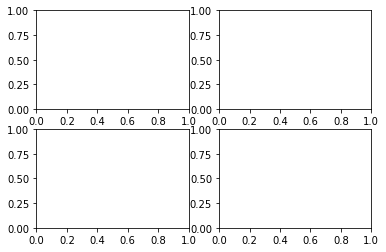

In [49]:
# 기본 틀 만들기
fig = plt.figure()

# add_subplot 메서드 # 그래프 격자 만들기 # 행크기, 열크기 지정
axes1 = fig.add_subplot(2,2,1)
axes2 = fig.add_subplot(2,2,2)
axes3 = fig.add_subplot(2,2,3)
axes4 = fig.add_subplot(2,2,4)

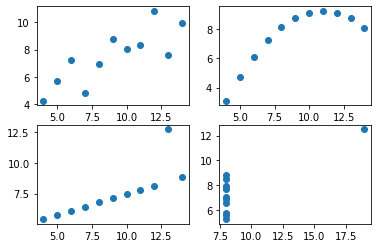

In [50]:
axes1.plot(dataset_1['x'], dataset_1['y'], 'o')
axes2.plot(dataset_2['x'], dataset_2['y'], 'o')
axes3.plot(dataset_3['x'], dataset_3['y'], 'o')
axes4.plot(dataset_4['x'], dataset_4['y'], 'o')

fig    # 그래프 확인하려면 반드시 fig 입력

* 그래프 격자에 제목 추가 **set_title** 메서드

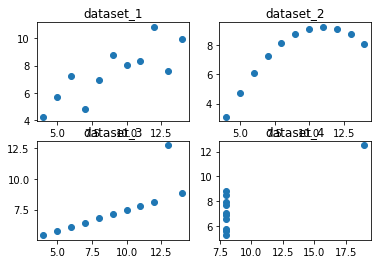

In [51]:
axes1.set_title("dataset_1")
axes2.set_title("dataset_2")
axes3.set_title("dataset_3")
axes4.set_title("dataset_4")

fig

* 기본 틀에 제목 추가 **suptitle** 메서드

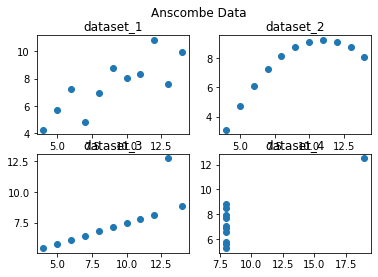

In [52]:
fig.suptitle("Anscombe Data")

fig

* 각 그래프의 레이아웃 조절 **tight_layout** 메서드

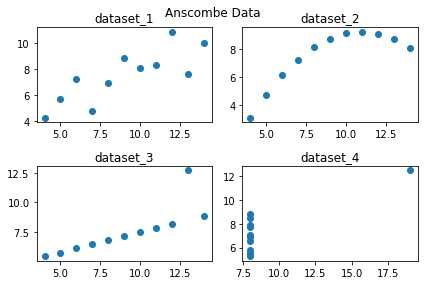

In [53]:
fig.tight_layout()

fig

## 4-2 matplotlib 라이브러리 자유자재로 사용하기

### 기초 그래프 그리기

tips 데이터 집합 : 어떤 식당에서 팁을 지불한 손님의 정보

#### 기초 그래프 그리기 - 히스토그램, 산점도 그래프, 박스 그래프

In [54]:
tips = sns.load_dataset("tips")
print(tips.head())
print(type(tips))

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
<class 'pandas.core.frame.DataFrame'>


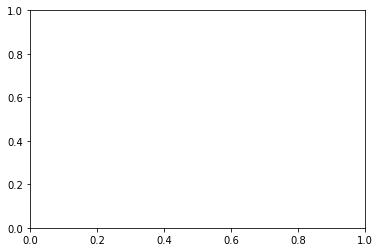

In [55]:
# 기본 틀 마련
fig = plt.figure()

# 그래프 격자 구성
axes1 = fig.add_subplot(1,1,1)

* 히스토그램 **hist** 메서드 : 데이터프레임의 열 데이터 분포와 빈도 살펴보는 용도로 사용
 + 변수(열) 하나만 사용해 그린 그래프 = 일변량 그래프
 + x축의 간격 **bins** 인잣값

* 그래프, x축, y축 제목 추가

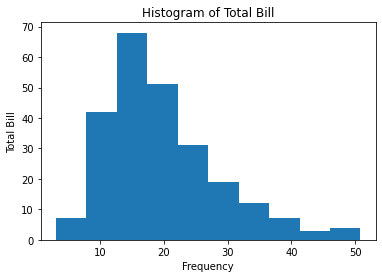

In [56]:
axes1.hist(tips['total_bill'], bins=10)

axes1.set_title('Histogram of Total Bill')
axes1.set_xlabel('Frequency')
axes1.set_ylabel('Total Bill')

fig

* 산점도 그래프 **scatter** 메서드
 + 변수 2개 사용해 그린 그래프 = 이변량 그래프

Text(0, 0.5, 'Tip')

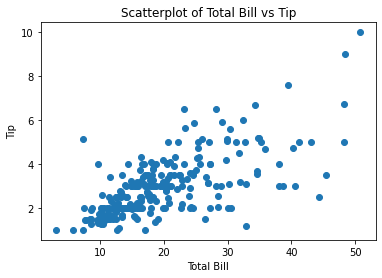

In [57]:
scatter_plot = plt.figure()
axes1 = scatter_plot.add_subplot(1,1,1)

axes1.scatter(tips['total_bill'], tips['tip'])

axes1.set_title('Scatterplot of Total Bill vs Tip')
axes1.set_xlabel('Total Bill')
axes1.set_ylabel('Tip')

* 박스 그래프 **boxplot** 메서드
 + 이산형 변수(명확하게 구분되는 값)와 연속형 변수(명확하게 셀 수 없는 범위의 값) 함께 사용하는 그래프

 + 이산형 변수 구분하기 위한 이름 추가 **labels** 인잣값

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


Text(0.5, 1.0, 'Boxplot of Tips by Sex')

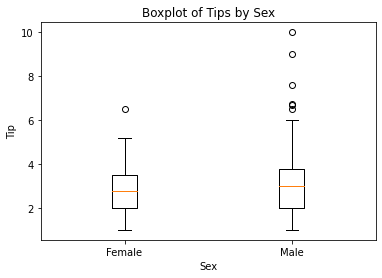

In [58]:
boxplot = plt.figure()
axes1 = boxplot.add_subplot(1,1,1)

axes1.boxplot( [ tips[tips['sex'] == 'Female']['tip'], tips[tips['sex'] == 'Male']['tip']],
              labels=['Female','Male'])

axes1.set_xlabel('Sex')
axes1.set_ylabel('Tip')
axes1.set_title('Boxplot of Tips by Sex')

### 다변량 그래프 그리기

다변량 그래프 : 3개 이상의 변수를 사용한 그래프

ex) 지불 금액과 팁을 사용하여 산점도 그래프 -> 성별 추가해 그래프

-> 점의 색상, 점의 크기, 점의 투명도 등 그래프 요소 추가해 그래프 표현

#### 다변량 데이터로 다변량 그래프 그리기 - 산점도 그래프

In [59]:
# 성별은 0,1과 같은 정수로 치환
def recode_sex(sex):
  if sex == 'Female':
    return 0
  else:
    return 1

In [60]:
# Female, Male을 0,1로 치환
tips['sex_color'] = tips['sex'].apply(recode_sex)

Text(0, 0.5, 'Tip')

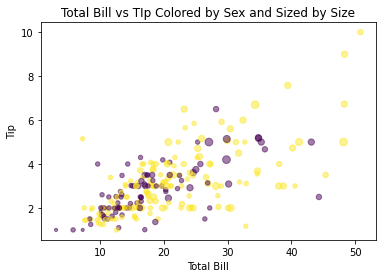

In [61]:
# 테이블당 인원 수(size)는 점의 크기로 치환
scatter_plot = plt.figure()
axes1 = scatter_plot.add_subplot(1,1,1)

axes1.scatter(
    x=tips['total_bill'],
    y=tips['tip'],
    s=tips['size']*10,           # 점의 크기 조절
    c=tips['sex_color'],         # 점의 색상 조절
    alpha=0.5)                   # alpha로 점의 투명도 조절

axes1.set_title('Total Bill vs TIp Colored by Sex and Sized by Size')
axes1.set_xlabel('Total Bill')
axes1.set_ylabel('Tip')

## 4-3 seaborn 라이브러리 자유자재로 사용하기

seaborn라이브러리 : matplotlib라이브러리를 기반으로 만든 라이브러리 / 더 화려한 그래프 그릴 수 있다

In [62]:
import seaborn as sns

tips = sns.load_dataset("tips")

#### 단변량 그래프 그리기 - 히스토그램

**subplots** 메서드 : 기본 틀 만들기

**distplot** 메서드 : 열 데이터 전달해 히스토그램 그리기

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Total Bill Histogram with Density Plot')

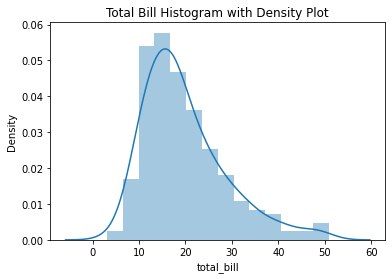

In [63]:
ax = plt.subplots()
ax = sns.distplot(tips['total_bill'])
ax.set_title('Total Bill Histogram with Density Plot')

* distplot메서드 -> 히스토그램과 밀집도 그래프 같이 그려
* 밀집도 그래프 제외 => **kde**인잣값 False로 설정

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frequency')

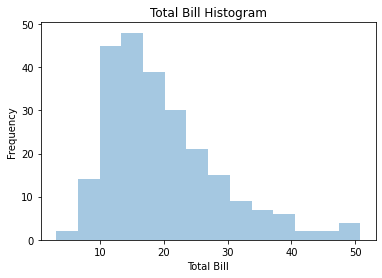

In [64]:
ax = plt.subplots()
ax = sns.distplot(tips['total_bill'], kde=False)
ax.set_title('Total Bill Histogram')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Frequency')

* 밀집도 그래프만 나타내 => **hist**인자를 False로 설정

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Unit Probability')

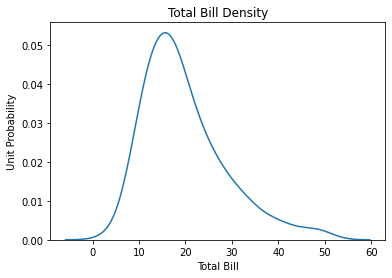

In [65]:
ax = plt.subplots()
ax = sns.distplot(tips['total_bill'], hist=False)
ax.set_title('Total Bill Density')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Unit Probability')

* 양탄자 그래프 (**rug**인자) : 그래프의 축에 동일한 길이의 직선을 붙여 데이터의 밀집 정도를 표현한 그래프

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Total Bill')

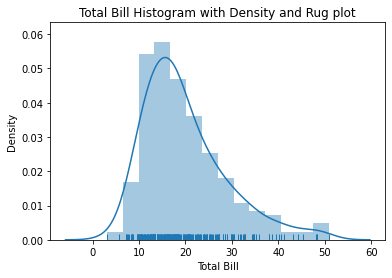

In [66]:
ax = plt.subplots()
ax = sns.distplot(tips['total_bill'], rug=True)
ax.set_title('Total Bill Histogram with Density and Rug plot')
ax.set_xlabel('Total Bill')

* count 그래프(**countplot** 메서드) : 이산값을 나타낸 그래프

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Frequency')

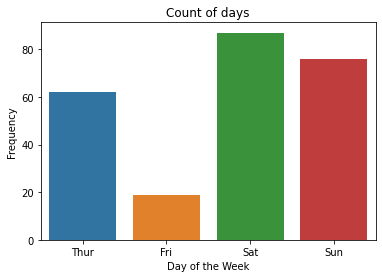

In [67]:
ax = plt.subplots()
ax = sns.countplot('day', data=tips)     # tips 데이터프레임의 day 열 데이터
ax.set_title('Count of days')
ax.set_xlabel('Day of the Week')
ax.set_ylabel('Frequency')

#### 다양한 종류의 이변량 그래프 그리기

1. 산점도 그래프 그리기

* 산점도 그래프 & 회귀선 함께 => **regplot** 메서드
 + 회귀선 제거하려면 => **fit_reg** 인자를 False로 설정

Text(0, 0.5, 'Tip')

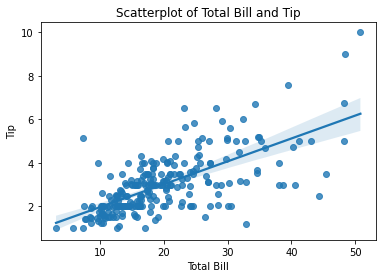

In [68]:
ax = plt.subplots()
ax = sns.regplot(x='total_bill', y='tip', data=tips)
ax.set_title('Scatterplot of Total Bill and Tip')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Tip')

Text(0, 0.5, 'Tip')

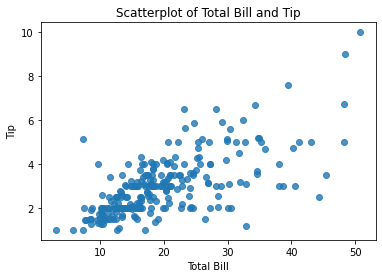

In [69]:
# 회귀선 제거
ax = plt.subplots()
ax = sns.regplot(x='total_bill', y='tip', data=tips, fit_reg=False)
ax.set_title('Scatterplot of Total Bill and Tip')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Tip')

* 산점도 그래프와 히스토그램 함께 => **jointplot** 메서드
 + x, y 인자에 원하는 열 이름 지정 / **data**인잣값으로 데이터프레임 지정

Text(0.5, 1.03, 'Joint Plot of Total Bill and Tip')

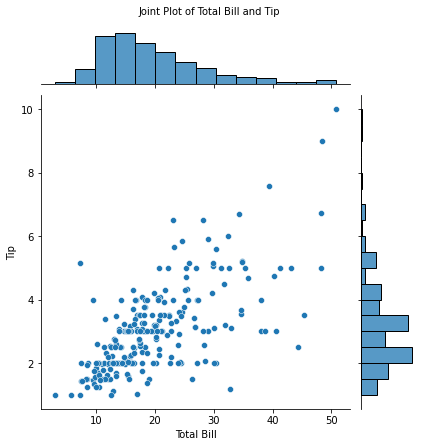

In [70]:
joint = sns.jointplot(x='total_bill', y='tip', data=tips)
joint.set_axis_labels(xlabel='Total Bill', ylabel='Tip')         # x,y 축 지정
joint.fig.suptitle('Joint Plot of Total Bill and Tip', fontsize = 10, y=1.03)

* 육각 그래프(hexbin) : 2차원 표면에 육각형으로 데이터를 쌓아 표현하는 그래프
 + 산점도 그래프의 데이터 구분하기 쉬워
 + 특정 데이터의 개수가 많아지면 점점 진한 색으로 표현
 + jointplot 메서드 그대로 사용
 + **kind**인잣값을 hex로 지정

Text(0.5, 1.03, 'Hexbin Joint Plot of Total Bill and Tip')

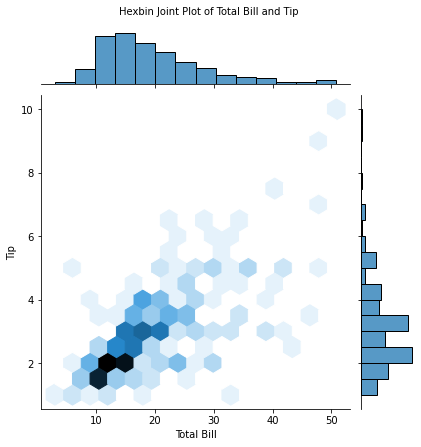

In [71]:
hexbin = sns.jointplot(x="total_bill", y="tip", data=tips, kind="hex")
hexbin.set_axis_labels(xlabel='Total Bill', ylabel='Tip')
hexbin.fig.suptitle('Hexbin Joint Plot of Total Bill and Tip', fontsize=10, y=1.03)

2. 이차원 밀집도 그리기

* 이차원 밀집도 => **kdeplot** 메서드
 + 그래프에 음영 효과 => **shade** 인잣값을 True로 지정

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1681: FutureWarning: Use `x` and `y` rather than `data` `and `data2`
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Tip')

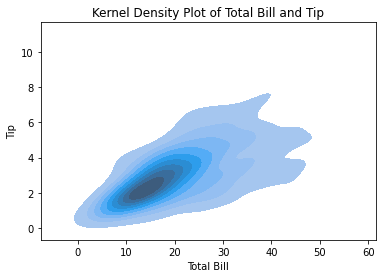

In [72]:
ax = plt.subplots()
ax = sns.kdeplot(data=tips['total_bill'],
                 data2=tips['tip'],
                 shade=True)
ax.set_title('Kernel Density Plot of Total Bill and Tip')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Tip')

3. 바 그래프 그리기

* **barplot** : 지정한 변수의 평균을 계산하여 그려

Text(0, 0.5, 'Average total bill')

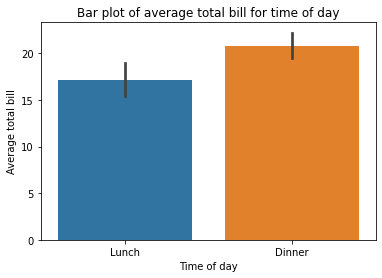

In [73]:
# 시간에 따라 지불한 비용의 평균
ax = plt.subplots()
ax = sns.barplot(x='time', y='total_bill', data=tips)
ax.set_title('Bar plot of average total bill for time of day')
ax.set_xlabel('Time of day')
ax.set_ylabel('Average total bill')

4. 박스 그래프 그리기

* **boxplot** : 최솟값, 1분위수, 중간값, 3분위수, 최댓값, 이상치 등 다양한 통계량을 한 번에 표현하는 그래프

Text(0, 0.5, 'Total Bill')

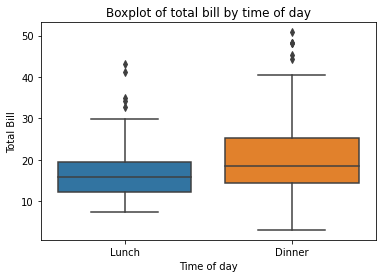

In [74]:
ax = plt.subplots()
ax = sns.boxplot(x='time', y='total_bill', data=tips)
ax.set_title('Boxplot of total bill by time of day')
ax.set_xlabel('Time of day')
ax.set_ylabel('Total Bill')

5. 바이올린 그래프 그리기

박스 그래프는 데이터 분산이 모호하게 표현돼

* **violinplot**메서드 : 박스 그래프에 커널 밀도 추정


Text(0, 0.5, 'Total Bill')

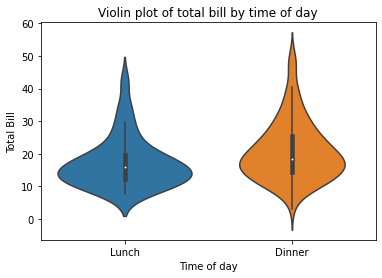

In [75]:
ax = plt.subplots()
ax = sns.violinplot(x='time',y='total_bill', data=tips)
ax.set_title('Violin plot of total bill by time of day')
ax.set_xlabel('Time of day')
ax.set_ylabel('Total Bill')

6. 관계 그래프 그리기

* **pairplot** 메서드 : 지금까지 설명한 그래프 종합

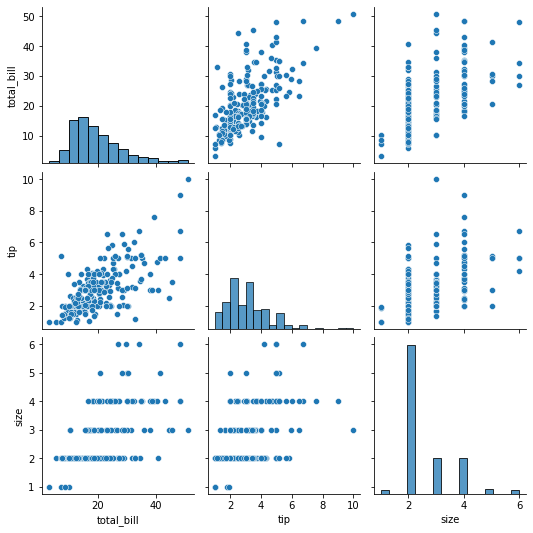

In [76]:
fig = sns.pairplot(tips)

* 중복된 정보가 표현돼 -> 중복된 그래프가 그려지는 위치를 직접 지정하여 원하는 그래프로 교체
> + **map_upper**메서드 : 대각선을 기준으로 위쪽에 그릴 그래프 지정
> + **map_lower**메서드 : 대각선을 기준으로 아래쪽에 그릴 그래프 지정
> + **map_diag**메서드 : 대각선을 중심으로 그래프 그려

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103

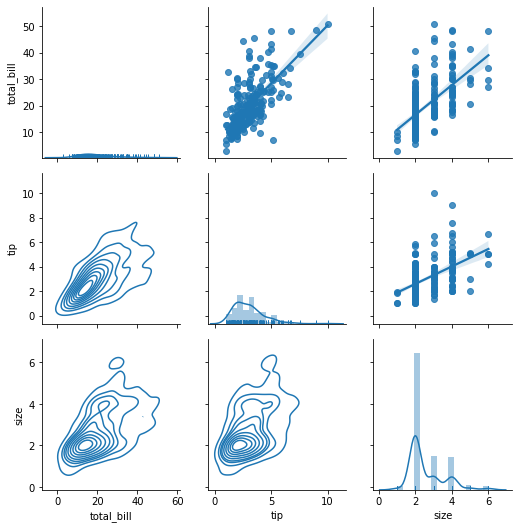

In [77]:
pair_grid = sns.PairGrid(tips)
pair_grid = pair_grid.map_upper(sns.regplot)    # 산점도 그래프
pair_grid = pair_grid.map_lower(sns.kdeplot)    # 이차원 밀집도
pair_grid = pair_grid.map_diag(sns.distplot, rug=True)  # 히스토그램, 밀집도
plt.show()

#### 다변량 그래프 그리기

1. 바이올린 그래프 그리기 - 색상 추가

* **hue**인잣값 : 색상에 사용할 열 이름 추가

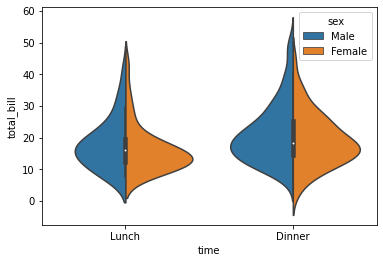

In [78]:
ax = plt.subplots()
ax = sns.violinplot(x='time', y='total_bill', hue='sex', data=tips, split=True)

2. 산점도, 관계 그래프 그리기 - 색상 추가

**lmplot** : 산점도 그래프

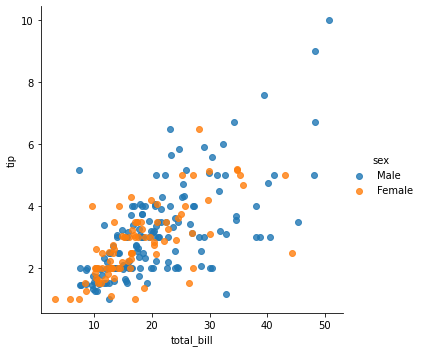

In [79]:
scatter = sns.lmplot(x='total_bill', y='tip', data=tips, hue='sex', fit_reg=False)

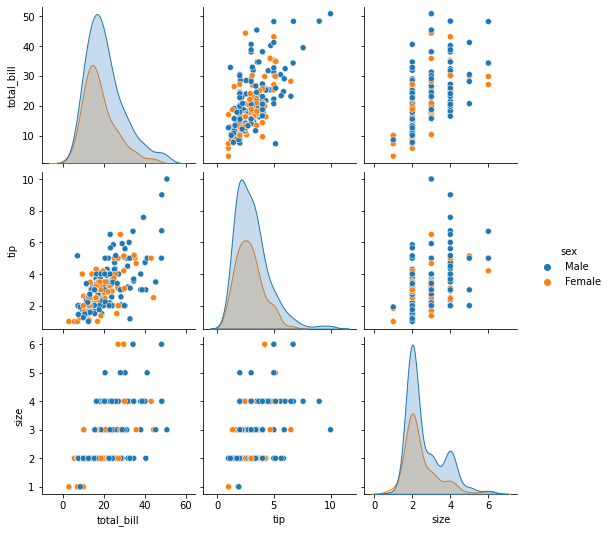

In [80]:
fig = sns.pairplot(tips, hue='sex')

3. 산점도 그래프의 크기와 모양 조절하기

* 점 크기 조절 => **scatter_kws**에 딕셔너리 형태로 인잣값 전달

ValueError: ignored

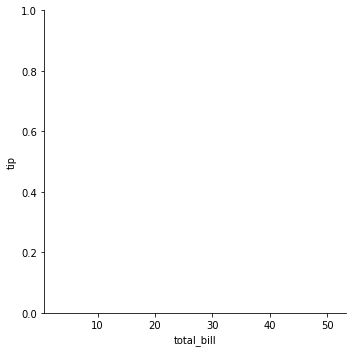

In [81]:
scatter = sns.lmplot(x='total_bill', y='tip', data=tips, fit_reg=False, hue='sex', scatter_kws={'s':tips['size']*10})

* 점 모양 변경 => **markers**인잣값에 리스트 형태로 전달

ValueError: ignored

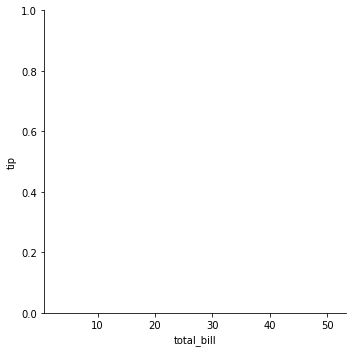

In [82]:
scatter = sns.lmplot(x='total_bill', y='tip',data=tips, fit_reg=False, hue='sex', markers=['o','x'], scatter_kws={'s':tips['size']*10})

5. lmplot 메서드로 4개의 데이터 그룹에 대한 그래프 한 번에 그리기

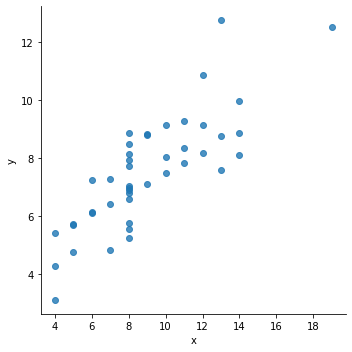

In [83]:
anscombe_plot = sns.lmplot(x='x',y='y',data=anscombe, fit_reg=False)  # 데이터 집합의 x,y열 전달, data인자에는 데이터프레임 전달

* **col_wrap**인자 : 그래프를 그릴 열의 최댓값 지정
* **col**인자 : 데이터 그룹을 구분할 열 지정 

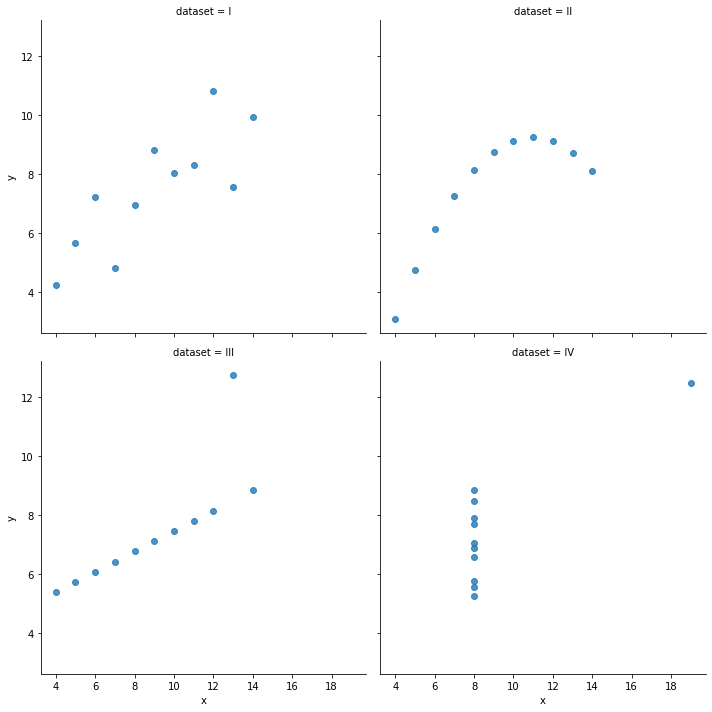

In [86]:
anscombe_plot = sns.lmplot(x='x',y='y',data=anscombe, fit_reg=False, col='dataset',col_wrap=2)

#### (알아두면 좋아요) FacetGrid 클래스

lmplot 메서드 사용 복잡 -> FacetGrid 클래스 사용

* FacetGrid에 데이터프레임, 그룹을 구분할 열 이름 전달
* **map**메서드에 그래프 종류, x축으로 지정할 열 이름 전달

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103

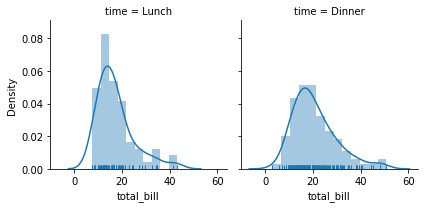

In [87]:
facet = sns.FacetGrid(tips,col='time')
facet.map(sns.distplot, 'total_bill', rug=True)

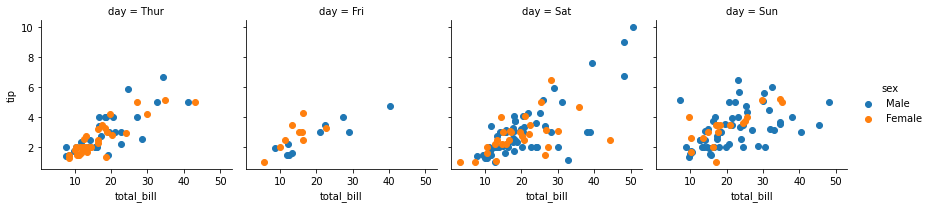

In [88]:
# 다변량 그래프
facet = sns.FacetGrid(tips, col='day', hue='sex')
facet = facet.map(plt.scatter, 'total_bill', 'tip')
facet = facet.add_legend()

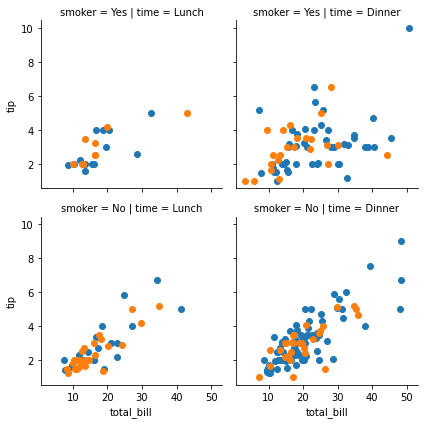

In [89]:
# 다변량 그래프 # time(2개 값), smoker(2개 값) -> 2행 2열 격자
facet = sns.FacetGrid(tips, col='time', row='smoker', hue='sex')
facet.map(plt.scatter, 'total_bill','tip')

## 4-4 데이터프레임과 시리즈로 그래프 그리기

* 히스토그램 **hist**

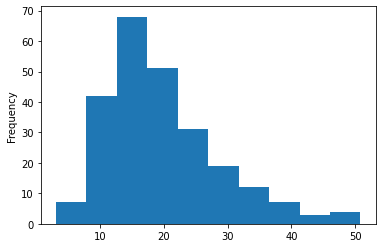

In [90]:
ax = plt.subplots()
ax = tips['total_bill'].plot.hist()

* 투명도 조절 => **alpha**인자

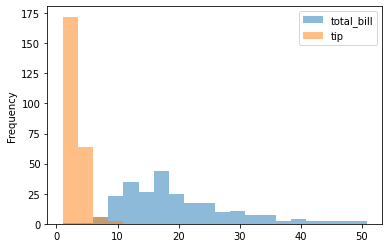

In [91]:
fig, ax = plt.subplots()
ax = tips[['total_bill','tip']].plot.hist(alpha=0.5, bins=20, ax=ax)

* 밀집도 => **kde**, 산점도 그래프 => **scatter**, 육각 그래프 => **hexbin**

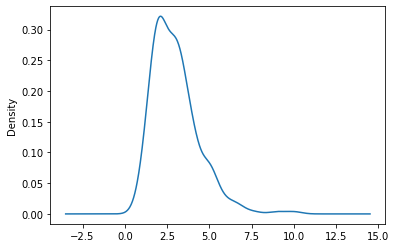

In [92]:
ax = plt.subplots()
ax = tips['tip'].plot.kde()

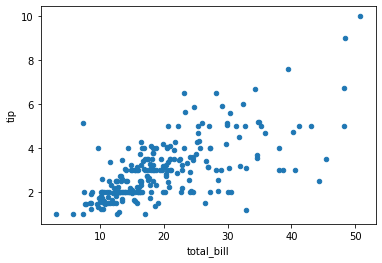

In [93]:
fig, ax = plt.subplots()
ax = tips.plot.scatter(x='total_bill',y='tip',ax=ax)

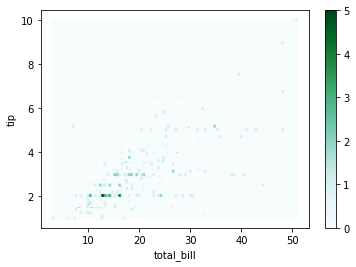

In [94]:
fig, ax = plt.subplots()
ax = tips.plot.hexbin(x='total_bill',y='tip',ax=ax)

* 육각 그래프의 육각형 크기 => **gridsize**인자

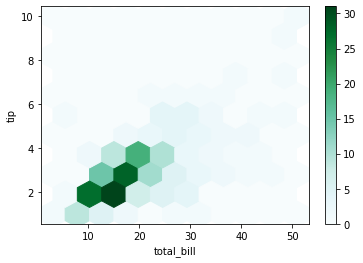

In [95]:
fig, ax = plt.subplots()
ax = tips.plot.hexbin(x='total_bill',y='tip', gridsize=10, ax=ax)

* 박스 그래프 **box**메서드

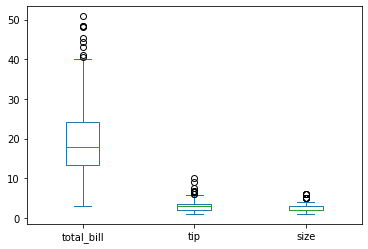

In [96]:
fig, ax = plt.subplots()
ax = tips.plot.box(ax=ax)

## 4-5 seaborn 라이브러리로 그래프 스타일 설정하기

**set_style**메서드 : 그래프의 스타일 변경
* 스타일을 적용할 부분에서 한 번만 실행 -> 메서드를 실행한 이후의 그래프가 모두 지정한 스타일로 바뀌어
* darkgrid, whitegrid, dark, white, ticks로 5종류

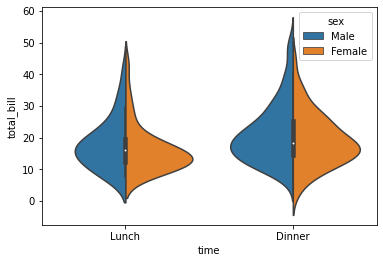

In [97]:
fig, ax = plt.subplots()
ax = sns.violinplot(x='time',y='total_bill', hue='sex',data=tips, split=True)

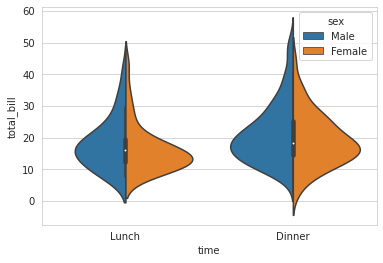

In [98]:
# whitegrid   # 그래프 배경에 가로 줄
sns.set_style('whitegrid')
fig, ax = plt.subplots()
ax = sns.violinplot(x='time',y='total_bill',hue='sex',data=tips,split=True)

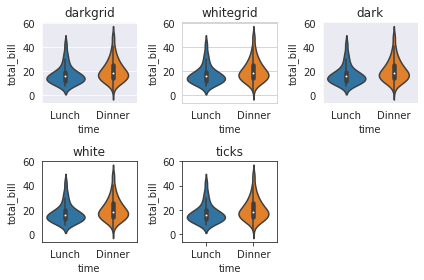

In [99]:
# for문 이용해 모든 스타일 하나씩 적용
fig = plt.figure()

seaborn_styles = ['darkgrid','whitegrid','dark','white','ticks']

for idx, style in enumerate(seaborn_styles):
  plot_position = idx+1
  with sns.axes_style(style):
    ax = fig.add_subplot(2,3,plot_position)
    violin = sns.violinplot(x='time',y='total_bill',data=tips,ax=ax)
    violin.set_title(style)

fig.tight_layout()